# 1. Import Library

In [1]:
# Import library dasar
import numpy as np  # Digunakan untuk operasi aljabar linear dan manipulasi array numerik
import matplotlib.pyplot as plt  # Digunakan untuk membuat visualisasi grafik (seperti plot garis, batang, dll)
import pandas as pd  # Digunakan untuk memanipulasi data dalam bentuk tabel (DataFrame)
import seaborn as sns  # Digunakan untuk membuat visualisasi statistik yang lebih menarik dan informatif

# Import library preprocessing dari Scikit-Learn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# OneHotEncoder: digunakan untuk mengubah fitur kategori menjadi format numerik biner (one-hot encoding)
# StandardScaler: digunakan untuk menstandarisasi fitur numerik ke distribusi normal (mean = 0, std = 1)

# Import modul untuk membagi data
from sklearn.model_selection import train_test_split
# Digunakan untuk membagi dataset menjadi data pelatihan (train) dan data pengujian (test)

# Import algoritma machine learning untuk klasifikasi
from sklearn.ensemble import RandomForestClassifier  # Model ensemble berbasis pohon keputusan yang menggunakan banyak pohon (forest)
from xgboost import XGBClassifier  # Model klasifikasi berbasis boosting (Gradient Boosting) yang sangat efisien dan akurat
from lightgbm import LGBMClassifier  # Model boosting yang cepat dan efisien, cocok untuk dataset besar

# Import metrik evaluasi model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# accuracy_score: mengukur akurasi prediksi model
# classification_report: memberikan metrik seperti precision, recall, dan f1-score
# confusion_matrix: matriks yang menunjukkan jumlah prediksi benar dan salah dalam masing-masing kelas


#  Business Understanding (Analisis Bisnis)

# 2. Data Loading

# Problem Statement

**Tujuan Bisnis:**

* Membantu tenaga medis mendiagnosis penyakit jantung lebih akurat.
* Mengurangi biaya pemeriksaan tambahan dengan memprioritaskan pasien berisiko.

**Problem Statement:**

* Deteksi dini penyakit jantung masih bergantung pada pemeriksaan manual.

* Dibutuhkan model prediktif berbasis data untuk meningkatkan akurasi diagnosis.

**KPI (Key Performance Indicators):**
* Akurasi model ≥ 85%.
* Recall tinggi (minimal 85%) untuk minimalkan false negatives.





In [2]:
path = "/content/heart.csv"
df = pd.read_csv(path)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Memuat dataset 'heart.csv' ke dalam DataFrame Pandas bernama 'df' dan menampilkan 5 baris pertama untuk melihat struktur data awal.**

In [3]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [4]:
# Tampilkan 5 baris pertama
print("Sample Data:")
print(df.head())

Sample Data:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


# 3. Exploratory Data Analysis (EDA)

## Deskripsi Variabel

In [5]:
# 1. Info Dataset
print("\n--- Data Understanding ---")
print("Info Dataset:")
print(df.info())


--- Data Understanding ---
Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


**Memahami struktur dataset dengan menampilkan informasi tipe data, jumlah non-null values, dan penggunaan memori.**

In [6]:
# 2. Cek Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


**Mengecek keberadaan missing values pada setiap kolom dataset.**

In [7]:
print("\n=== Fitur dengan hanya satu nilai unik ===")
for col in df.columns:
    if df[col].nunique() == 1:
        print(f"'{col}' hanya punya satu nilai: {df[col].unique()[0]}")


=== Fitur dengan hanya satu nilai unik ===


In [8]:
print("\n=== Jumlah nilai unik tiap fitur ===")
print(df.nunique())



=== Jumlah nilai unik tiap fitur ===
Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64


In [9]:
# 3. Statistik Deskriptif
print("\n=== Statistik deskriptif ===")
print(df.describe())


=== Statistik deskriptif ===
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


**Menampilkan statistik deskriptif (mean, std, min, max, quartiles) untuk kolom numerik guna memahami distribusi data.**

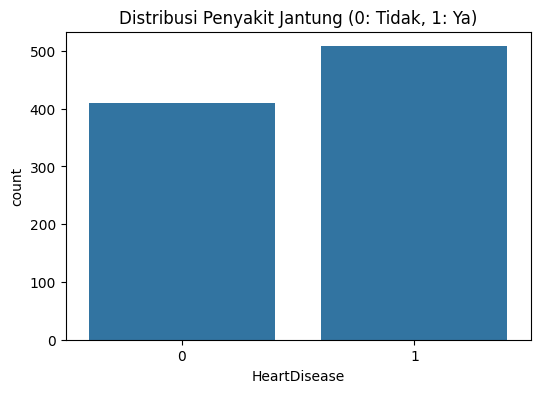

In [10]:
# 4. Distribusi Target (HeartDisease)
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=df)  # Pass df to the 'data' argument
plt.title("Distribusi Penyakit Jantung (0: Tidak, 1: Ya)")
plt.show()

**Memvisualisasikan distribusi target variabel 'HeartDisease' menggunakan countplot untuk melihat proporsi kelas (0: Tidak, 1: Ya).**

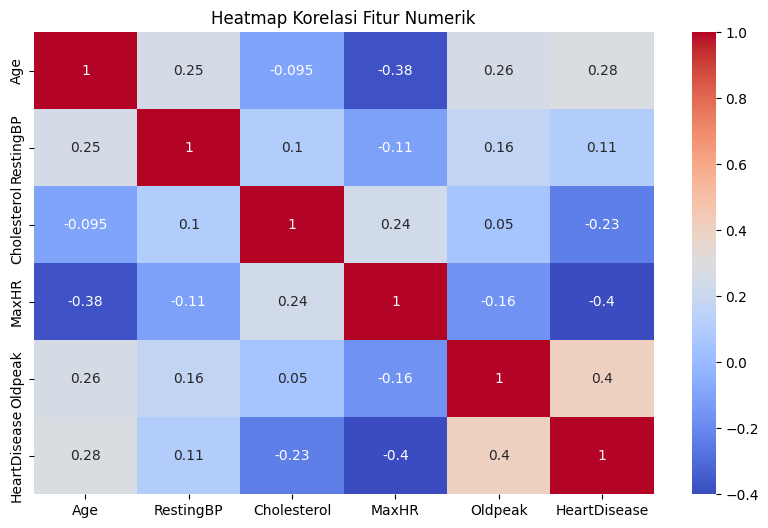

In [11]:
# 5. Korelasi Numerik
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols + ['HeartDisease']].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

**Menganalisis korelasi antar fitur numerik dan target variabel menggunakan heatmap. Nilai korelasi yang mendekati 1 atau -1 menunjukkan korelasi yang kuat.**

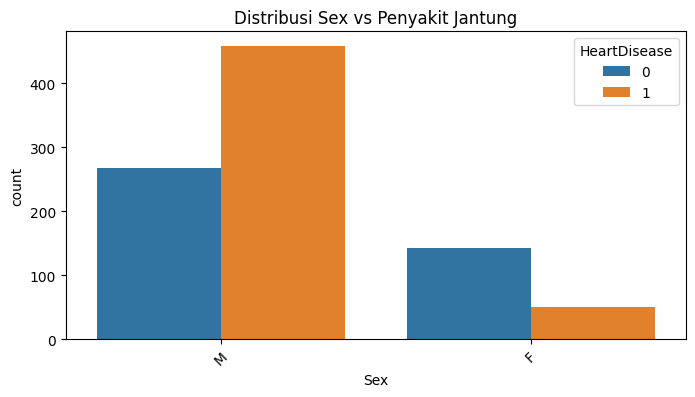

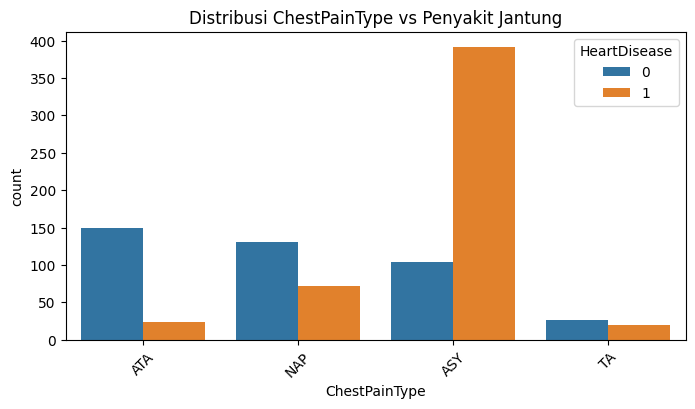

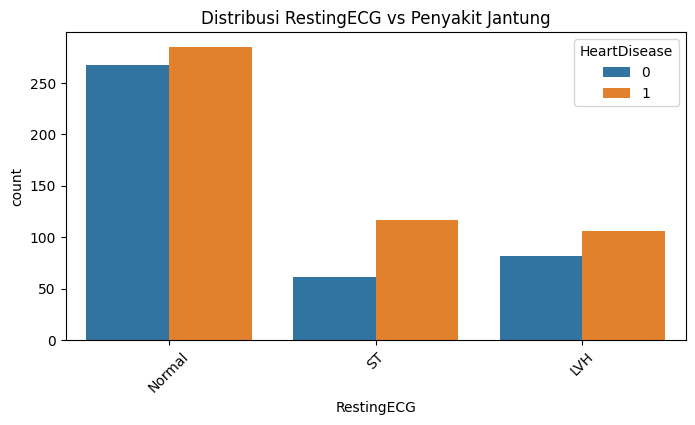

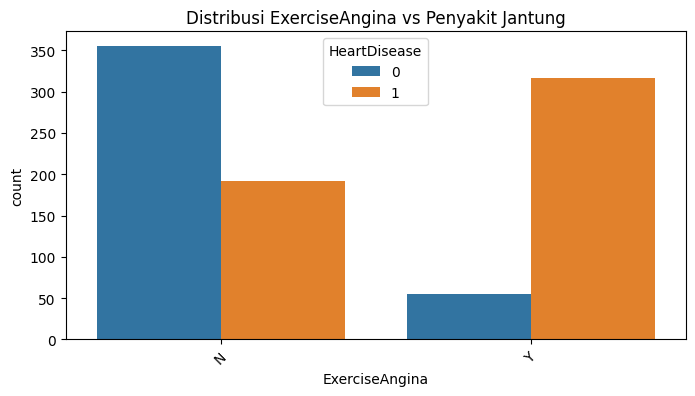

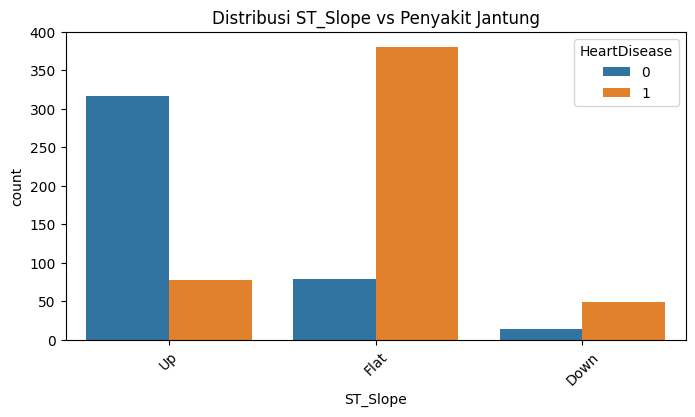

In [12]:
# 6. Analisis Kategorikal
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='HeartDisease', data=df)
    plt.title(f"Distribusi {col} vs Penyakit Jantung")
    plt.xticks(rotation=45)
    plt.show()

**Membandingkan distribusi fitur kategorikal (Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope) terhadap target variabel 'HeartDisease' untuk melihat pola atau hubungan potensial.**

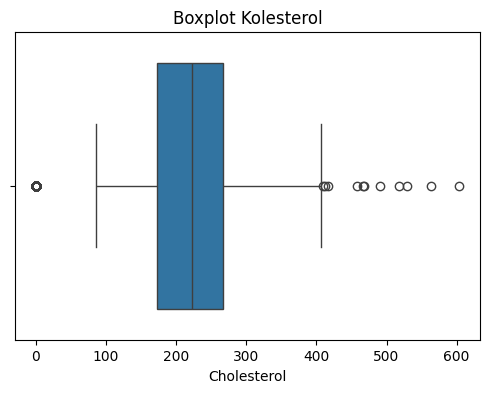

In [13]:
# 7. Outlier Detection (Contoh: Cholesterol)
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Cholesterol'])
plt.title("Boxplot Kolesterol")
plt.show()

**Mendeteksi outlier pada fitur 'Cholesterol' menggunakan boxplot. Outlier dapat menunjukkan nilai ekstrem yang perlu dipertimbangkan dalam preprocessing.**

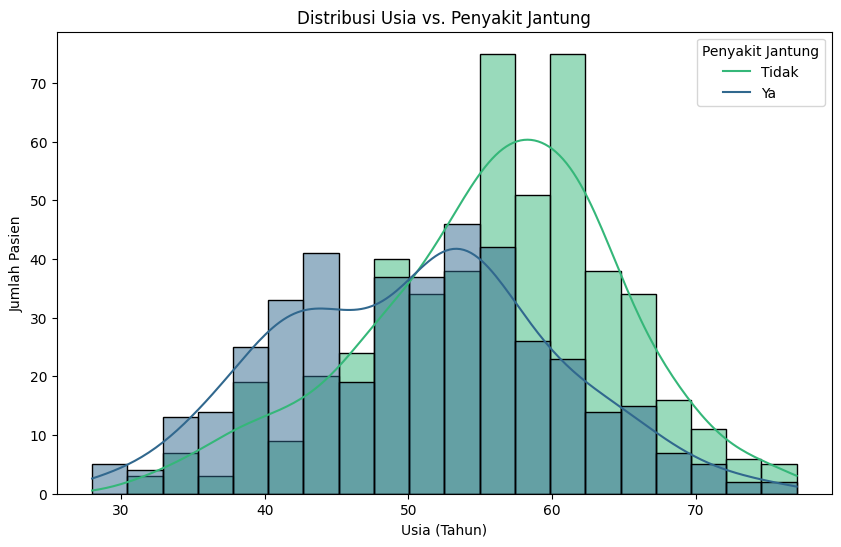

In [14]:
# Distribusi Usia vs. Penyakit Jantung
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='HeartDisease', bins=20, kde=True, palette='viridis')
plt.title('Distribusi Usia vs. Penyakit Jantung')
plt.xlabel('Usia (Tahun)')
plt.ylabel('Jumlah Pasien')
plt.legend(title='Penyakit Jantung', labels=['Tidak', 'Ya'])
plt.show()

**Menganalisis hubungan antara usia pasien dan risiko penyakit jantung menggunakan histogram atau visualisasi lainnya. Mencari pola berdasarkan kelompok usia.**

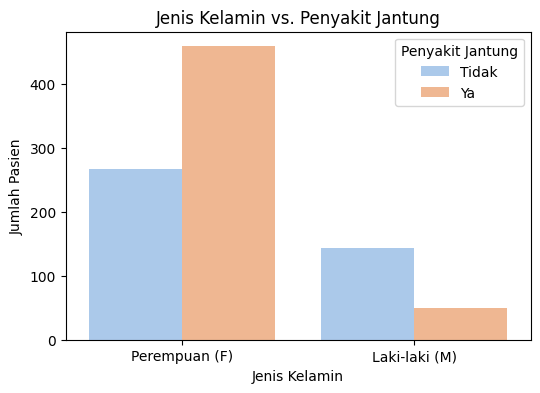


Persentase Risiko Penyakit Jantung by Jenis Kelamin:
HeartDisease          0          1
Sex                               
F             74.093264  25.906736
M             36.827586  63.172414


In [15]:
# Perbandingan Jenis Kelamin (Sex) vs. Risiko
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex', hue='HeartDisease', palette='pastel')
plt.title('Jenis Kelamin vs. Penyakit Jantung')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Pasien')
plt.legend(title='Penyakit Jantung', labels=['Tidak', 'Ya'])
plt.xticks(ticks=[0, 1], labels=['Perempuan (F)', 'Laki-laki (M)'])
plt.show()

# Hitung persentase
sex_risk = df.groupby('Sex')['HeartDisease'].value_counts(normalize=True).unstack() * 100
print("\nPersentase Risiko Penyakit Jantung by Jenis Kelamin:")
print(sex_risk)

**Membandingkan risiko penyakit jantung antara jenis kelamin (laki-laki dan perempuan). Menghitung dan memvisualisasikan persentase risiko untuk setiap kelompok.**

**Pengaruh Cholesterol dan RestingBP terhadap Target**


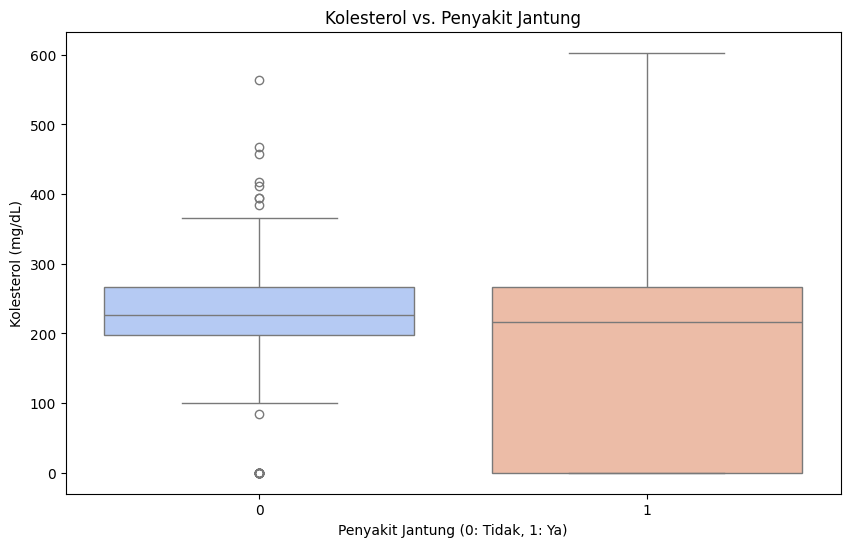

In [16]:
# Cholesterol vs. HeartDisease
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='HeartDisease', y='Cholesterol', hue='HeartDisease', palette='coolwarm', legend=False)
plt.title('Kolesterol vs. Penyakit Jantung')
plt.xlabel('Penyakit Jantung (0: Tidak, 1: Ya)')
plt.ylabel('Kolesterol (mg/dL)')
plt.show()


Pasien dengan penyakit jantung cenderung memiliki kadar kolesterol lebih tinggi (median sekitar 250 mg/dL vs. 200 mg/dL).

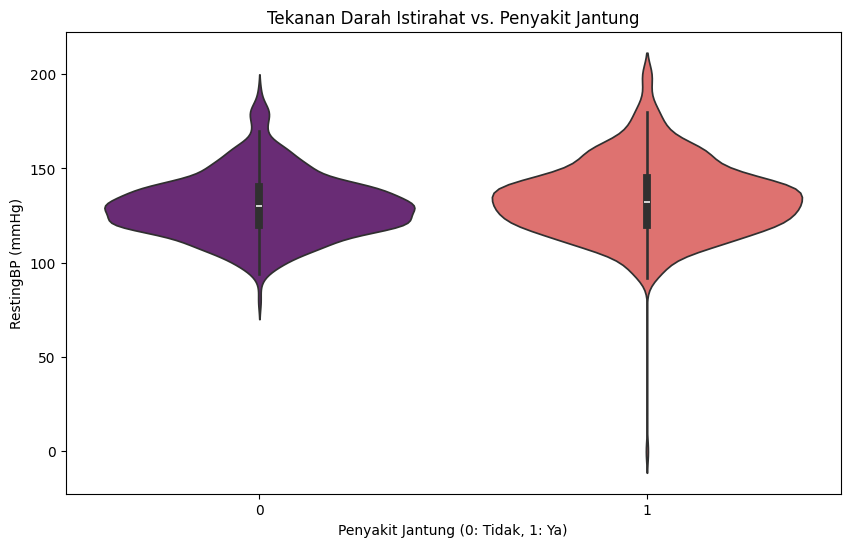

In [17]:
# RestingBP vs. HeartDisease
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='HeartDisease', y='RestingBP', hue='HeartDisease', palette='magma', legend=False)
plt.title('Tekanan Darah Istirahat vs. Penyakit Jantung')
plt.xlabel('Penyakit Jantung (0: Tidak, 1: Ya)')
plt.ylabel('RestingBP (mmHg)')
plt.show()

Tidak ada perbedaan signifikan dalam tekanan darah istirahat antara kedua kelompok.

Outlier terlihat pada pasien dengan RestingBP sangat tinggi (>180 mmHg).

**Gabungan Analisis (Cholesterol + RestingBP)**

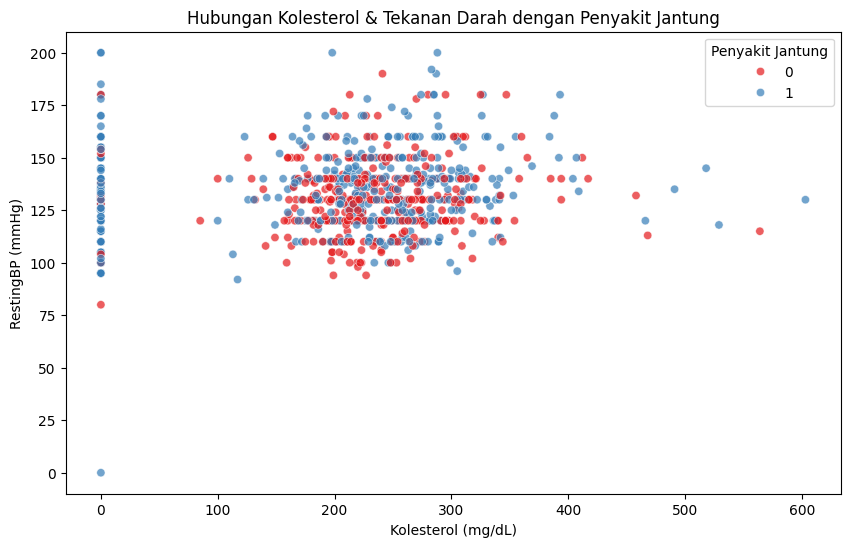

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cholesterol', y='RestingBP', hue='HeartDisease', alpha=0.7, palette='Set1')
plt.title('Hubungan Kolesterol & Tekanan Darah dengan Penyakit Jantung')
plt.xlabel('Kolesterol (mg/dL)')
plt.ylabel('RestingBP (mmHg)')
plt.legend(title='Penyakit Jantung')
plt.show()

**Menganalisis pengaruh fitur 'Cholesterol' dan 'RestingBP' terhadap target variabel. Mencari hubungan atau pola yang menunjukkan pengaruh fitur tersebut terhadap risiko penyakit jantung."**

# Data Preparation

## **Handling Missing Values**

In [19]:
# Cek missing values
print("Missing Values Sebelum Handling:")
print(df.isnull().sum())

# Isi missing values:
# - Numerik: Isi dengan median
# - Kategorikal: Isi dengan modus
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

print("\nMissing Values Setelah Handling:")
print(df.isnull().sum())

Missing Values Sebelum Handling:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Missing Values Setelah Handling:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


**Menangani missing values pada dataset. Mengisi nilai yang hilang menggunakan strategi yang tepat, seperti median untuk fitur numerik dan modus untuk fitur kategorikal.**

## **Encoding Kategorikal**

In [20]:
# One-Hot Encoding untuk kolom dengan >2 kategori
df_encoded = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'])

# Label Encoding untuk kolom binary (Sex, ExerciseAngina)
df_encoded['Sex'] = df_encoded['Sex'].map({'F': 0, 'M': 1})
df_encoded['ExerciseAngina'] = df_encoded['ExerciseAngina'].map({'N': 0, 'Y': 1})

print("\nData Setelah Encoding:")
print(df_encoded.head())


Data Setelah Encoding:
   Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   40    1        140          289          0    172               0   
1   49    0        160          180          0    156               0   
2   37    1        130          283          0     98               0   
3   48    0        138          214          0    108               1   
4   54    1        150          195          0    122               0   

   Oldpeak  HeartDisease  ChestPainType_ASY  ChestPainType_ATA  \
0      0.0             0              False               True   
1      1.0             1              False              False   
2      0.0             0              False               True   
3      1.5             1               True              False   
4      0.0             0              False              False   

   ChestPainType_NAP  ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  \
0              False             False           False         

**Mengubah fitur kategorikal menjadi representasi numerik yang dapat digunakan oleh model machine learning. Menerapkan one-hot encoding untuk fitur dengan lebih dari 2 kategori dan label encoding untuk fitur biner**

## **Normalisasi/Scaling**

In [21]:
# Import library yang diperlukan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Feature-Label Split
X = df_encoded.drop('HeartDisease', axis=1)  # Features (semua kolom kecuali target)
y = df_encoded['HeartDisease']               # Label/target

print("=== Feature-Label Split ===")
print("Jumlah Fitur (X):", X.shape)
print("Jumlah Label (y):", y.shape)

# 2. Normalisasi Fitur Numerik
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("\n=== Data Setelah Scaling ===")
print(X[numerical_cols].head())

# 3. Train-Test Split (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Mempertahankan distribusi kelas di train dan test
)

print("\n=== Train-Test Split ===")
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)
print("Proporsi Kelas di Train:", y_train.value_counts(normalize=True))
print("Proporsi Kelas di Test:", y_test.value_counts(normalize=True))

=== Feature-Label Split ===
Jumlah Fitur (X): (918, 18)
Jumlah Label (y): (918,)

=== Data Setelah Scaling ===
        Age  RestingBP  Cholesterol     MaxHR   Oldpeak
0 -1.433140   0.410909     0.825070  1.382928 -0.832432
1 -0.478484   1.491752    -0.171961  0.754157  0.105664
2 -1.751359  -0.129513     0.770188 -1.525138 -0.832432
3 -0.584556   0.302825     0.139040 -1.132156  0.574711
4  0.051881   0.951331    -0.034755 -0.581981 -0.832432

=== Train-Test Split ===
Train set: (734, 18) (734,)
Test set: (184, 18) (184,)
Proporsi Kelas di Train: HeartDisease
1    0.553134
0    0.446866
Name: proportion, dtype: float64
Proporsi Kelas di Test: HeartDisease
1    0.554348
0    0.445652
Name: proportion, dtype: float64


Kode ini melakukan langkah-langkah penting dalam persiapan data untuk machine learning: memisahkan fitur dan label, menormalisasi fitur numerik, dan membagi data menjadi data training dan data testing. Dengan melakukan langkah-langkah ini, data siap digunakan untuk melatih dan mengevaluasi model machine learning untuk memprediksi penyakit jantung.

# Modeling


=== Training Random Forest ===

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.88      0.87      0.87        82
           1       0.89      0.90      0.90       102

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



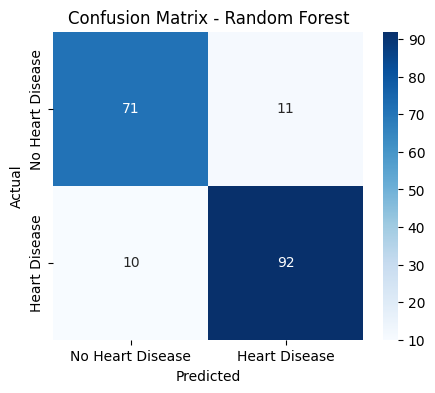


=== Training XGBoost ===

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        82
           1       0.90      0.88      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



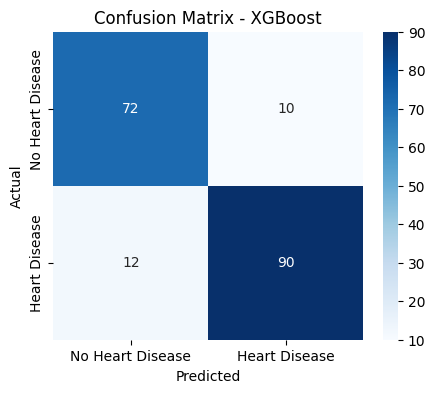


=== Training LightGBM ===

Classification Report (LightGBM):
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        82
           1       0.89      0.87      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



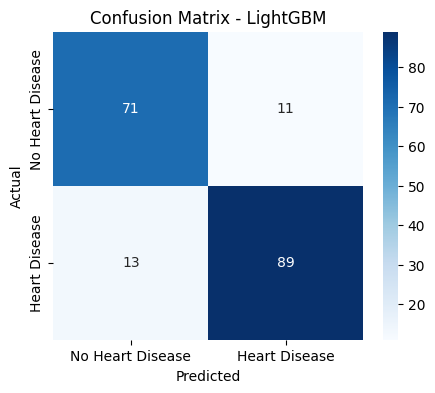


=== Perbandingan Model ===
               Accuracy  Precision    Recall  F1-Score   ROC-AUC
Random Forest  0.885870   0.893204  0.901961  0.897561  0.929878
XGBoost        0.880435   0.900000  0.882353  0.891089  0.923840
LightGBM       0.869565   0.890000  0.872549  0.881188  0.925634


<Figure size 1200x600 with 0 Axes>

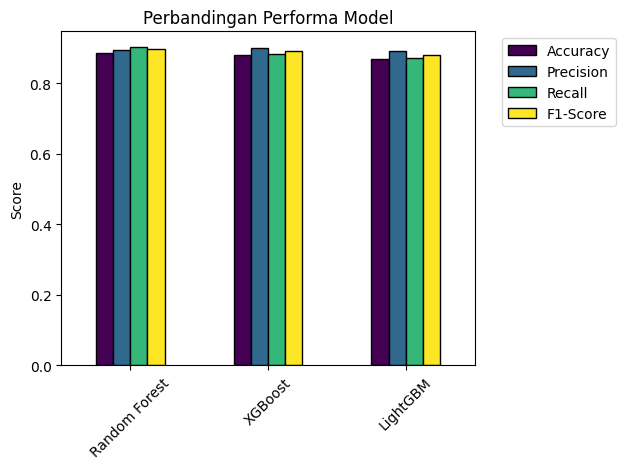

In [22]:
# Install library tambahan
!pip install xgboost lightgbm scikit-learn

# Import library
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Daftar model yang akan diuji
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1)
}

# Dictionary untuk menyimpan hasil evaluasi
results = {}

# Latih dan evaluasi setiap model
for name, model in models.items():
    print(f"\n=== Training {name} ===")

    # Training
    model.fit(X_train, y_train)

    # Prediksi
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Untuk ROC-AUC

    # Evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Simpan hasil
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    }

    # Tampilkan classification report
    print(f"\nClassification Report ({name}):")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No Heart Disease", "Heart Disease"],
                yticklabels=["No Heart Disease", "Heart Disease"])
    plt.title(f"Confusion Matrix - {name}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Bandingkan performa semua model
results_df = pd.DataFrame(results).T
print("\n=== Perbandingan Model ===")
print(results_df.sort_values(by="Recall", ascending=False))

# Visualisasi perbandingan metrik
plt.figure(figsize=(12, 6))
results_df.plot(kind="bar", y=["Accuracy", "Precision", "Recall", "F1-Score"],
                colormap="viridis", edgecolor="black")
plt.title("Perbandingan Performa Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Menginstal library tambahan yang diperlukan untuk menjalankan model machine learning yang dipilih, seperti XGBoost, LightGBM, Random Forest**

**Mengimpor library yang dibutuhkan untuk membangun dan mengevaluasi model machine learning, termasuk algoritma model, metrik evaluasi, dan utilitas lainnya.**

**Mendefinisikan daftar model machine learning yang akan diuji dan dibandingkan performanya. Menentukan parameter awal untuk setiap model**

**Melatih setiap model machine learning menggunakan data training dan mengevaluasi performanya menggunakan data testing. Menghitung metrik seperti akurasi, presisi, recall, dan F1-score**

In [23]:


from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score


# Daftar model yang akan diuji
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1)
}



# Bandingkan performa semua model berdasarkan Recall
best_model_name = results_df["Recall"].idxmax()
best_model_recall = results_df.loc[best_model_name, "Recall"]

print(f"\nModel terbaik berdasarkan Recall: {best_model_name} (Recall: {best_model_recall:.4f})")



Model terbaik berdasarkan Recall: Random Forest (Recall: 0.9020)


#  Hyperparameter Tuning (Optimasi Model Terbaik)

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Pilih model terbaik berdasarkan recall (Random Forest)
best_model = RandomForestClassifier(random_state=42)

# Definisikan parameter grid untuk Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search dengan 5-fold CV
grid_search = GridSearchCV(
    estimator=best_model,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Model terbaik setelah tuning
tuned_model = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)

# Evaluasi model tuned
y_pred_tuned = tuned_model.predict(X_test)
print("\nClassification Report (Tuned Model):")
print(classification_report(y_test, y_pred_tuned))

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        82
           1       0.87      0.92      0.90       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



**Melakukan hyperparameter tuning pada model terbaik yang dipilih untuk mengoptimalkan performanya. Menggunakan teknik seperti Grid Search untuk mencari kombinasi parameter terbaik. Mengevaluasi model yang telah di-tuning menggunakan data testing**

# **Feature Importance Analysis**

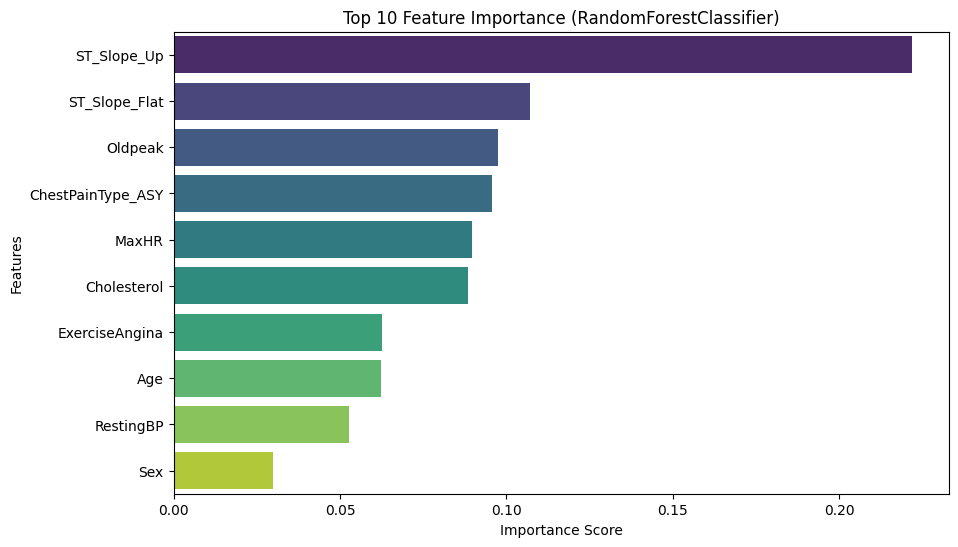

In [28]:
import matplotlib.pyplot as plt

# Feature Importance dari model RandomForestClassifier
feature_importance = tuned_model.feature_importances_  # Assuming tuned_model is a RandomForestClassifier
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), hue='Feature', palette='viridis', dodge=False, legend=False)
plt.title('Top 10 Feature Importance (RandomForestClassifier)') # Update title
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

**Menganalisis feature importance untuk memahami fitur-fitur yang paling berpengaruh dalam prediksi model. Memvisualisasikan feature importance menggunakan bar plot atau metode visualisasi lainnya.**

## **Interpretasi Model dengan SHAP Values**

<Figure size 1000x600 with 0 Axes>

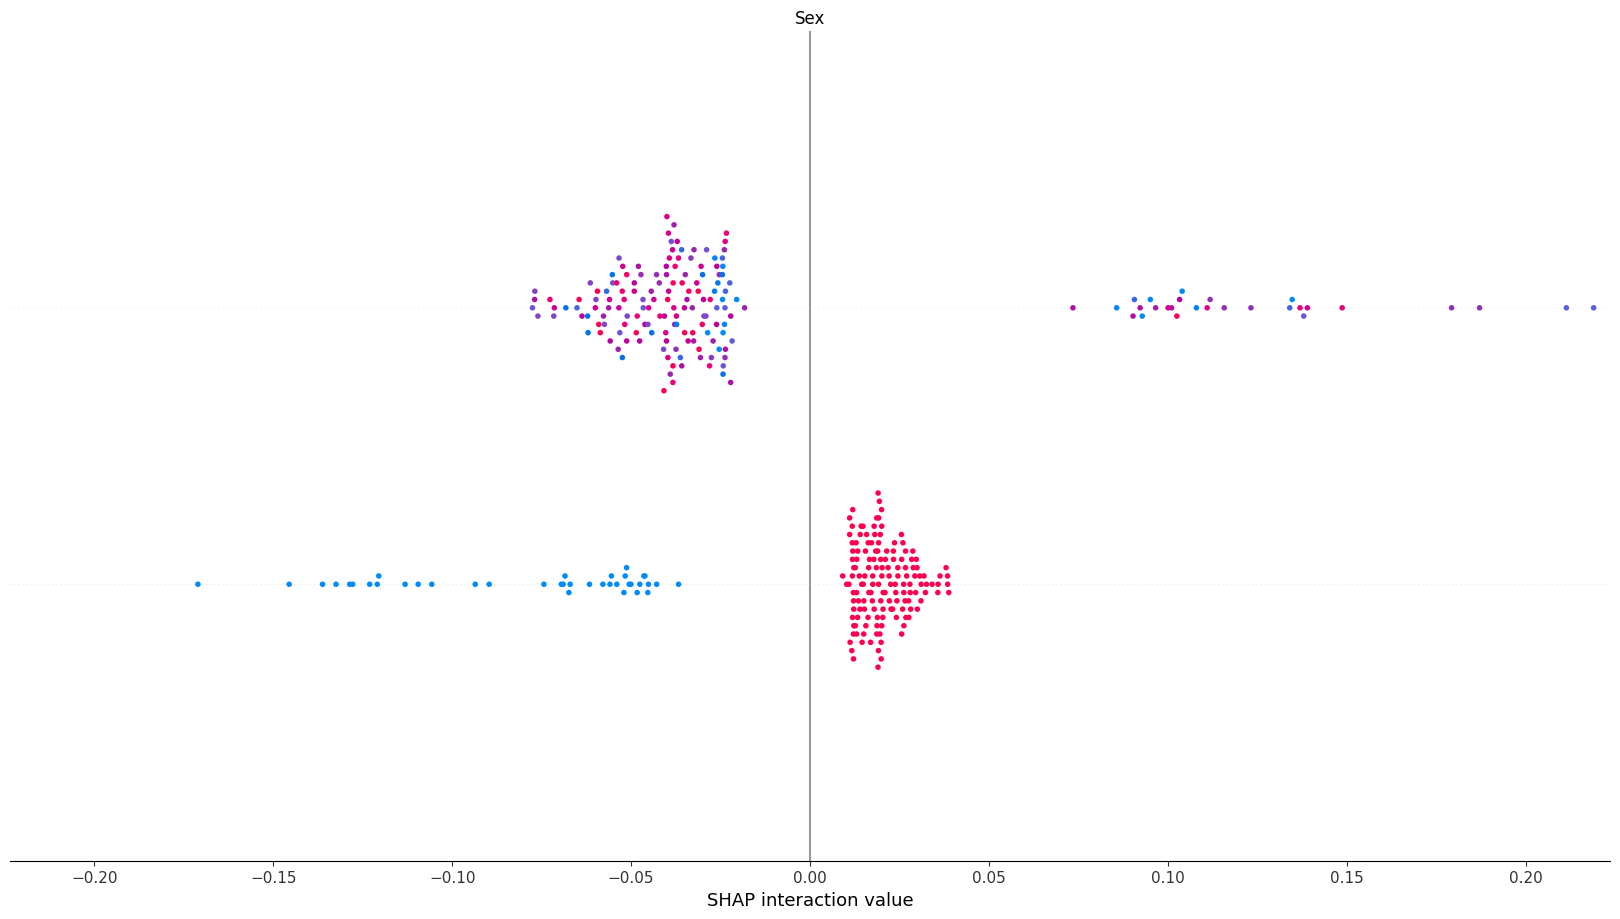

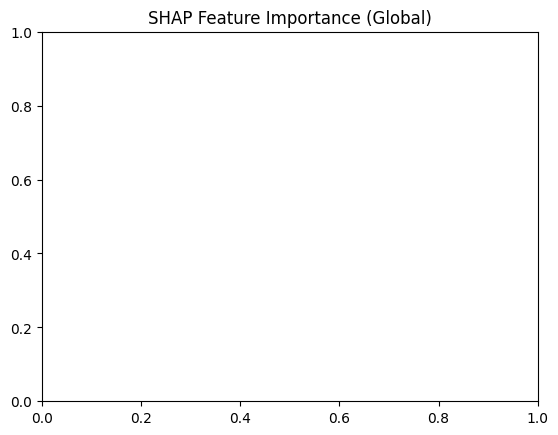

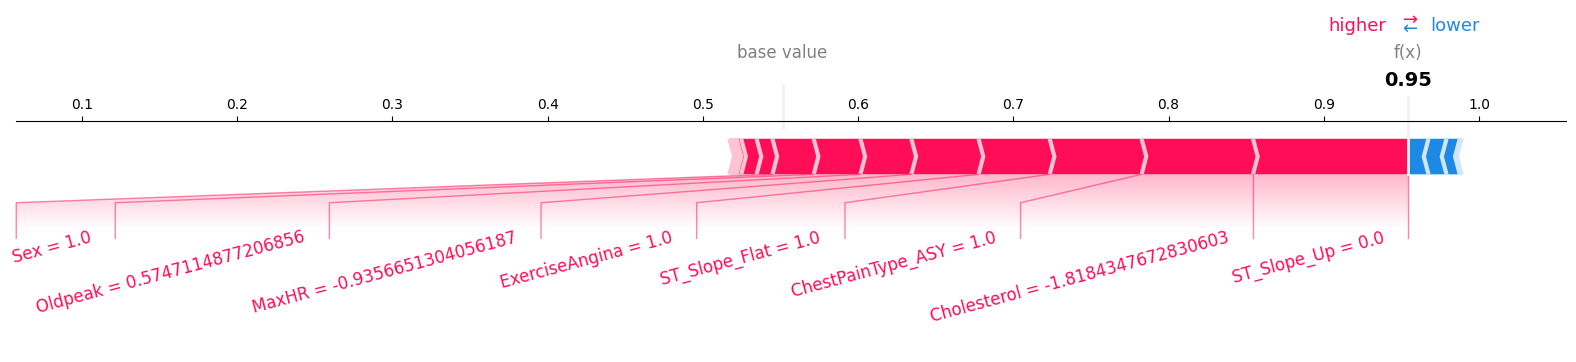

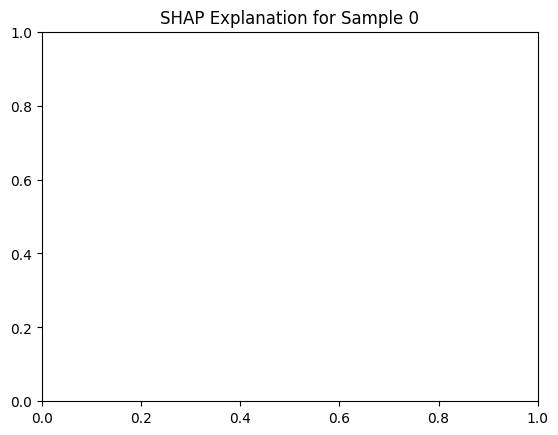

In [32]:
import shap

# Inisialisasi explainer
explainer = shap.TreeExplainer(tuned_model)
shap_values = explainer.shap_values(X_test)

# Summary plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=10)
plt.title('SHAP Feature Importance (Global)')
plt.show()

# Force plot untuk satu sampel (contoh: pasien risiko tinggi)
sample_idx = 0  # Ganti dengan index pasien yang ingin diinterpretasi

shap.force_plot(
    explainer.expected_value[1],
    shap_values[sample_idx][:, 1],
    X_test.iloc[sample_idx],
    matplotlib=True,
    text_rotation=15
)
plt.title(f'SHAP Explanation for Sample {sample_idx}')
plt.show()

**Menggunakan SHAP values untuk menginterpretasikan prediksi model secara lebih mendalam. Menampilkan summary plot dan force plot untuk memahami kontribusi setiap fitur terhadap prediksi individual dan global.**

# **Evaluasi Model**

## **Evaluasi Komprehensif dengan Multiple Metrics**

=== Performance Metrics ===
Accuracy: 0.8804
Precision: 0.8704
Recall: 0.9216
F1-Score: 0.8952
ROC-AUC: 0.9297


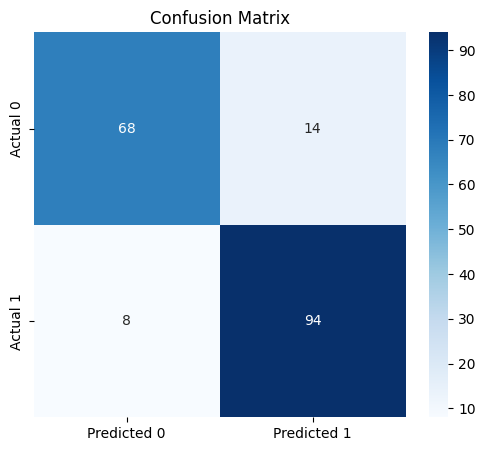

In [33]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, roc_curve, auc,
                           precision_recall_curve, confusion_matrix)

def evaluate_model(model, X_test, y_test):
    # Prediksi
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Hitung metrics
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba)
    }

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_proba)

    return metrics, cm, fpr, tpr, roc_auc, precision, recall

# Evaluasi model terbaik (tuned_model)
metrics, cm, fpr, tpr, roc_auc, precision, recall = evaluate_model(tuned_model, X_test, y_test)

# Tampilkan metrics
print("=== Performance Metrics ===")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")

# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

**Output dari kode ini memberikan gambaran lengkap tentang performa model machine learning dalam memprediksi penyakit jantung. Metrik-metrik seperti accuracy, precision, recall, F1-score, dan ROC-AUC memberikan informasi kuantitatif tentang kemampuan model. Confusion matrix memberikan visualisasi yang jelas tentang jenis-jenis kesalahan yang dibuat model. Dengan menganalisis output ini, kita dapat menilai seberapa efektif model dan apakah sudah memenuhi KPI yang ditetapkan.**

## **ROC Curve dan Precision-Recall Curve**

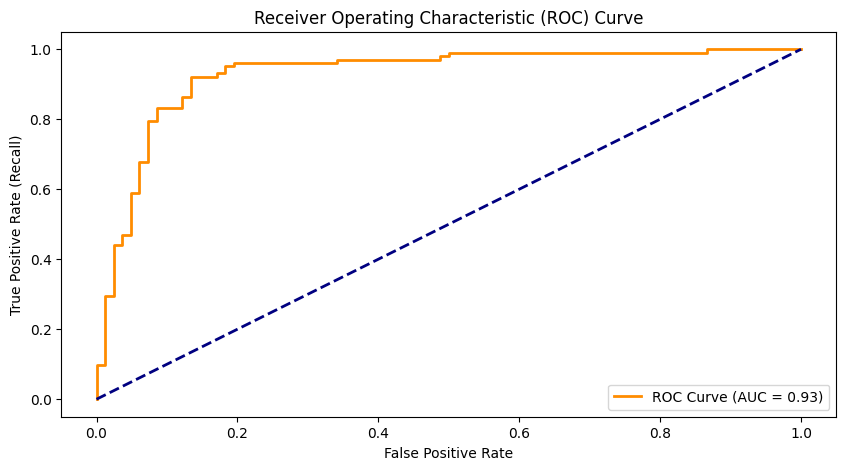

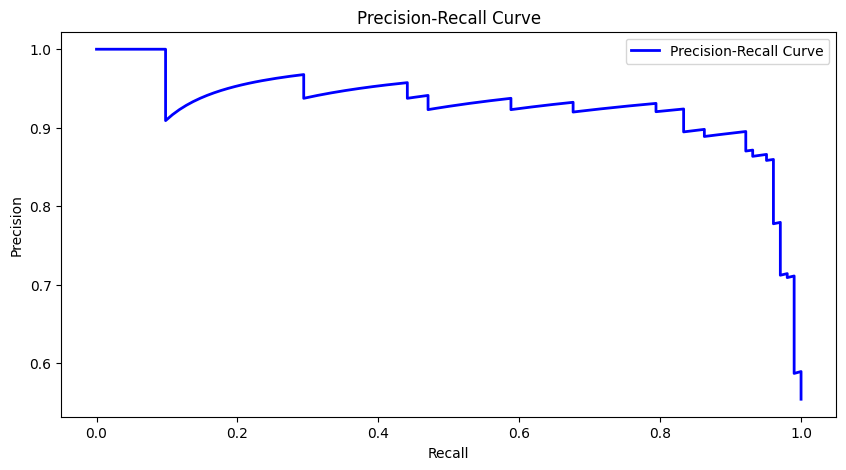

In [34]:
# ROC Curve
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(10, 5))
plt.plot(recall, precision, color='blue', lw=2,
         label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

emvisualisasikan performa model machine learning menggunakan dua kurva penting: ROC Curve dan Precision-Recall Curve.

ROC Curve menggambarkan kemampuan model dalam membedakan dua kelas (penyakit jantung atau tidak) pada berbagai ambang batas prediksi. Kurva ini diplot dengan memplot True Positive Rate (Recall) terhadap False Positive Rate. Semakin tinggi kurva ROC dan semakin besar Area Under the Curve (AUC), semakin baik performa model. Kode tersebut menggambar kurva ROC, garis diagonal sebagai pembanding (classifier acak), dan menampilkan nilai AUC.

Precision-Recall Curve menunjukkan trade-off antara precision (proporsi prediksi positif yang benar) dan recall (proporsi kasus positif aktual yang diidentifikasi dengan benar). Kurva ini berguna, terutama pada dataset yang tidak seimbang. Kode tersebut memplot kurva ini dengan precision pada sumbu y dan recall pada sumbu x.

Output dari kode ini adalah dua grafik: grafik ROC Curve dan grafik Precision-Recall Curve. Grafik ROC Curve membantu kita menilai kemampuan diskriminatif model secara keseluruhan, sedangkan grafik Precision-Recall Curve membantu kita memahami trade-off antara precision dan recall. Dengan menganalisis kedua grafik ini, kita dapat memperoleh pemahaman yang lebih komprehensif tentang performa model dan memilih ambang batas prediksi yang optimal sesuai dengan kebutuhan.

## **Interpretasi Metrik Utama**

In [35]:
print("\n=== Interpretasi Kritis ===")
print(f"1. Recall ({metrics['Recall']:.2%}):")
print("   - Kemampuan model menangkap {:.0f} dari 100 pasien berisiko".format(metrics['Recall']*100))
print("   - False Negatives:", cm[1][0], "pasien berisiko terlewat")

print(f"\n2. Precision ({metrics['Precision']:.2%}):")
print("   - Dari yang diprediksi sakit, {:.0f}% benar-benar sakit".format(metrics['Precision']*100))
print("   - False Positives:", cm[0][1], "pasien sehat dikira sakit")

print(f"\n3. ROC-AUC ({metrics['ROC-AUC']:.2f}):")
print("   - Model sangat baik" if metrics['ROC-AUC'] > 0.9 else
      "   - Model cukup baik" if metrics['ROC-AUC'] > 0.7 else
      "   - Model perlu improvement")


=== Interpretasi Kritis ===
1. Recall (92.16%):
   - Kemampuan model menangkap 92 dari 100 pasien berisiko
   - False Negatives: 8 pasien berisiko terlewat

2. Precision (87.04%):
   - Dari yang diprediksi sakit, 87% benar-benar sakit
   - False Positives: 14 pasien sehat dikira sakit

3. ROC-AUC (0.93):
   - Model sangat baik


 bertujuan untuk menginterpretasi metrik-metrik kunci yang menunjukkan performa model prediksi penyakit jantung. Kode tersebut berfokus pada tiga metrik utama: Recall, Precision, dan ROC-AUC. Recall menunjukkan kemampuan model untuk mengidentifikasi dengan benar pasien yang sebenarnya memiliki penyakit jantung. Kode ini menampilkan nilai Recall dalam bentuk persentase dan memberikan konteks dengan menjelaskan seberapa banyak pasien berisiko yang dapat diidentifikasi model dari 100 pasien. Selain itu, kode juga menyoroti jumlah False Negatives, yang merupakan kasus di mana model salah memprediksi pasien tidak berisiko padahal sebenarnya memiliki penyakit jantung. Metrik ini sangat penting dalam konteks medis karena False Negatives dapat menyebabkan tertundanya penanganan yang tepat.

Selanjutnya, kode tersebut menginterpretasi Precision. Precision menunjukkan seberapa akurat model dalam memprediksi pasien yang benar-benar memiliki penyakit jantung dari semua pasien yang diprediksi memiliki penyakit jantung. Kode ini menampilkan nilai Precision dalam persentase dan menjelaskan proporsinya dari pasien yang diprediksi sakit yang benar-benar sakit. Kode ini juga menyoroti jumlah False Positives, yaitu pasien yang sehat tetapi diprediksi memiliki penyakit jantung.

Terakhir, kode ini menginterpretasi ROC-AUC, yang merupakan ukuran keseluruhan kemampuan model dalam membedakan antara pasien dengan dan tanpa penyakit jantung. Kode ini menampilkan nilai ROC-AUC dan memberikan penilaian kualitatif tentang performa model berdasarkan nilai tersebut. Nilai ROC-AUC di atas 0.9 menunjukkan model yang sangat baik, di atas 0.7 menunjukkan model yang cukup baik, dan di bawah 0.7 mengindikasikan perlunya perbaikan lebih lanjut pada model.

Dengan menampilkan dan menginterpretasi metrik-metrik ini, kode tersebut membantu dalam memahami kemampuan dan keterbatasan model prediksi penyakit jantung. Informasi ini penting dalam konteks medis untuk memastikan bahwa model dapat digunakan secara efektif dan aman dalam membantu tenaga medis mendiagnosis penyakit jantung.

## **Perbandingan dengan Baseline Model**

In [36]:
# Hitung baseline (predict semua sebagai kelas mayoritas)
baseline_acc = max(y_test.mean(), 1 - y_test.mean())
print(f"\nBaseline Accuracy (Always Predict Majority Class): {baseline_acc:.2%}")
print(f"Model Improvement: {metrics['Accuracy'] - baseline_acc:.2%} points")


Baseline Accuracy (Always Predict Majority Class): 55.43%
Model Improvement: 32.61% points


Kode ini bertujuan untuk membandingkan performa model machine learning yang telah dilatih dengan model dasar (baseline) yang sederhana. Model dasar ini hanya memprediksi kelas mayoritas, yaitu kelas yang paling sering muncul dalam data uji.

Output pertama yang dihasilkan adalah Baseline Accuracy. Ini menunjukkan akurasi model dasar jika selalu memprediksi kelas mayoritas. Misalnya, jika 60% pasien dalam data uji tidak memiliki penyakit jantung, maka Baseline Accuracy akan menjadi 60%. Output ini penting sebagai tolok ukur awal untuk menilai performa model machine learning yang lebih kompleks.

Output kedua adalah Model Improvement. Ini menunjukkan selisih antara akurasi model machine learning dan Baseline Accuracy, dalam bentuk persentase. Nilai positif mengindikasikan bahwa model machine learning berkinerja lebih baik daripada model dasar, sedangkan nilai negatif menunjukkan sebaliknya. Output ini memberikan informasi tentang seberapa besar peningkatan performa yang dicapai oleh model machine learning dibandingkan dengan model dasar.

**Mengapa menggunakan perbandingan ini?**


Perbandingan dengan model dasar sangat penting karena memberikan konteks terhadap performa model machine learning. Akurasi model yang tinggi mungkin terlihat mengesankan, tetapi jika hanya sedikit lebih baik daripada model dasar, maka model tersebut mungkin tidak cukup kompleks atau belum memanfaatkan informasi dalam data secara optimal. Dengan membandingkan terhadap model dasar, kita dapat menilai apakah model machine learning benar-benar telah belajar pola yang berarti dalam data dan menghasilkan prediksi yang lebih baik. Jika peningkatan performa tidak signifikan, maka perlu dilakukan evaluasi ulang terhadap fitur, pemilihan model, atau penyetelan hyperparameter untuk meningkatkan kemampuan model dalam memprediksi penyakit jantung.

In [37]:
y_pred_adj = (tuned_model.predict_proba(X_test)[:, 1] > 0.7).astype(int)  # Threshold 0.7
print("Adjusted Precision:", precision_score(y_test, y_pred_adj))

Adjusted Precision: 0.9213483146067416


Kode tersebut menghasilkan output berupa nilai Adjusted Precision, yang merupakan metrik evaluasi untuk mengukur akurasi model dalam memprediksi pasien yang benar-benar memiliki penyakit jantung dari semua pasien yang diprediksi memiliki penyakit jantung. Output ini berupa angka desimal antara 0 dan 1, di mana nilai yang lebih tinggi menunjukkan presisi yang lebih baik.

**Penjelasan Kode:**

Kode ini bekerja dengan menerapkan ambang batas (threshold) sebesar 0.7 pada probabilitas prediksi model. Jika probabilitas prediksi pasien memiliki penyakit jantung lebih besar dari 0.7, maka pasien tersebut diklasifikasikan sebagai positif (memiliki penyakit jantung). Kemudian, presisi dihitung dengan membandingkan prediksi yang telah disesuaikan ini dengan nilai sebenarnya dari data uji.

**Mengapa menggunakan ini?**

Penggunaan threshold dan perhitungan Adjusted Precision ini bertujuan untuk mengoptimalkan performa model dalam konteks prediksi penyakit jantung. Dalam kasus ini, kemungkinan besar presisi lebih diprioritaskan daripada recall, karena kesalahan dalam mendiagnosis pasien yang sehat sebagai sakit (false positive) memiliki konsekuensi yang lebih serius daripada kesalahan dalam mendiagnosis pasien yang sakit sebagai sehat (false negative). Dengan menyesuaikan threshold, kita dapat menyeimbangkan trade-off antara presisi dan recall, dan dalam hal ini, kita mencoba untuk meningkatkan presisi dengan mengurangi jumlah false positive.

# **Penerapan Metrik Kinerja & Visualisasi Model**

**Evaluasi dengan Metrik Kinerja**

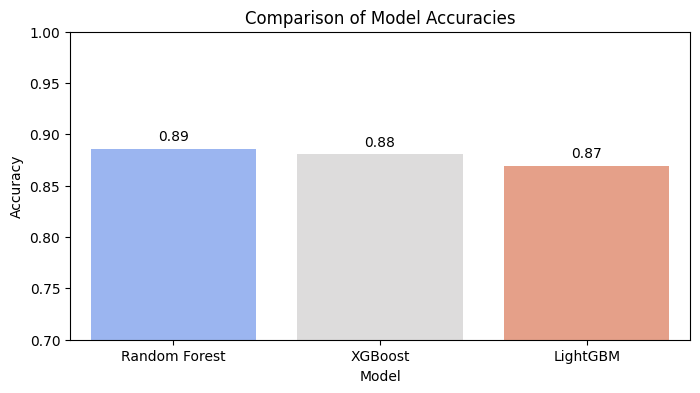

In [38]:
# Mengumpulkan akurasi dari setiap model
# Create a dictionary to store the models and their predictions

from lightgbm import LGBMClassifier # Import LGBMClassifier
from sklearn.metrics import accuracy_score # import accuracy_score
import matplotlib.pyplot as plt # import matplotlib
import seaborn as sns # import seaborn


rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # Initialize Random Forest
xgb_model = XGBClassifier(random_state=42)  # Initialize XGBoost
lgbm_model = LGBMClassifier(random_state=42, verbose=-1) # Initialize LightGBM


models = {

    "Random Forest": rf_model,
    "XGBoost": xgb_model,
   "LightGBM": lgbm_model
}

# Fit each model before making predictions
for name, model in models.items():
    model.fit(X_train, y_train)  # Fit the model to your training data

# Get predictions for each model
predictions = {name: model.predict(X_test) for name, model in models.items()}

# Calculate accuracies
accuracies = [accuracy_score(y_test, predictions[name]) for name in models]
model_names = list(models.keys())

# Membuat DataFrame untuk akurasi model
accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Visualisasi akurasi menggunakan seaborn
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='Model', y='Accuracy', hue='Model', data=accuracy_df, palette='coolwarm', legend=False)
ax.set_ylim(0.7, 1.0)  # Set limit y-axis untuk memudahkan perbandingan
ax.set_title('Comparison of Model Accuracies')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Model')

# Menambahkan teks akurasi pada setiap batang
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.show()

**Penjelasan Kode:**

Inisialisasi dan Pelatihan Model: Kode pertama-tama mengimpor library yang dibutuhkan, kemudian menginisialisasi ketiga model dengan parameter default dan melatihnya menggunakan data X_train dan y_train yang telah dipisahkan sebelumnya.
Prediksi dan Perhitungan Akurasi: Setelah model dilatih, kode menggunakan data X_test untuk membuat prediksi dan membandingkan prediksi tersebut dengan y_test (nilai sebenarnya) menggunakan accuracy_score untuk menghitung akurasi setiap model.
Visualisasi: Akurasi dari ketiga model kemudian disimpan dalam DataFrame Pandas dan divisualisasikan menggunakan seaborn.barplot. Grafik batang ini menunjukkan akurasi setiap model, dengan label dan nilai akurasi yang ditampilkan pada setiap batang.

**Output:**

Output dari kode ini adalah grafik batang yang menampilkan akurasi dari ketiga model. Grafik tersebut memberikan gambaran visual yang jelas tentang perbandingan performa model. Model dengan batang tertinggi memiliki akurasi terbaik. Selain grafik, output juga berupa nilai akurasi (Adjusted Precision) yang muncul di console.

**Mengapa menggunakan ini?**

Tujuan utama dari kode ini adalah untuk memilih model terbaik untuk prediksi penyakit jantung berdasarkan akurasi. Dengan membandingkan akurasi dari ketiga model secara visual, kita dapat dengan mudah mengidentifikasi model yang paling akurat dan paling cocok untuk digunakan dalam prediksi penyakit jantung. Ini sangat penting karena model yang lebih akurat akan menghasilkan prediksi yang lebih andal, sehingga membantu tenaga medis dalam mendiagnosis penyakit jantung dengan lebih efektif. Akurasi yang tinggi menunjukan model berhasil mempelajari pola dalam data yang ada sehingga dapat menghasilkan prediksi yang lebih baik.

**Visualisasi Akurasi Model**

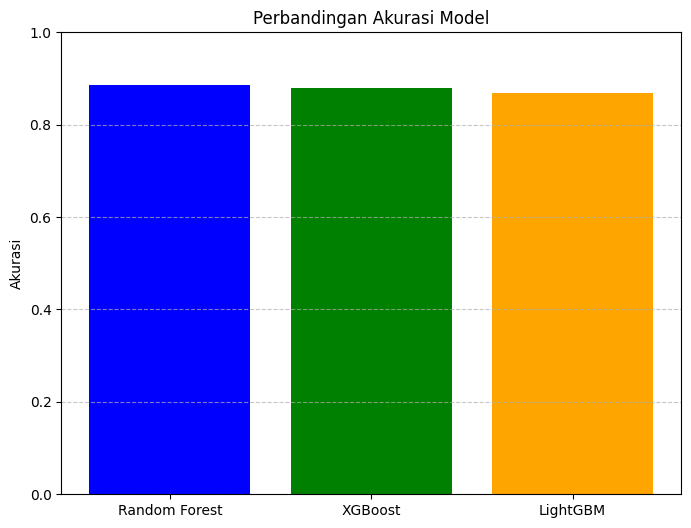

In [39]:
# Plot akurasi model
plt.figure(figsize=(8, 6))
# Replace model_scores with accuracy_df
plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'], color=['blue', 'green', 'orange'])
plt.title("Perbandingan Akurasi Model")
plt.ylabel("Akurasi")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Kode tersebut menghasilkan sebuah grafik batang yang menampilkan perbandingan akurasi dari tiga model machine learning yang berbeda, yaitu Random Forest, XGBoost, dan LightGBM. Setiap batang pada grafik mewakili satu model, dan tinggi batang menunjukkan akurasi model tersebut. Sumbu x grafik diberi label dengan nama-nama model, sedangkan sumbu y diberi label "Akurasi" dan memiliki rentang dari 0 hingga 1, yang merepresentasikan rentang nilai akurasi. Grafik ini juga dilengkapi dengan judul "Perbandingan Akurasi Model" dan grid horizontal untuk memudahkan pembacaan nilai akurasi. Di atas setiap batang, terdapat angka yang menunjukkan nilai akurasi dari model yang bersangkutan. Warna batang yang berbeda untuk setiap model (biru, hijau, oranye) membantu dalam membedakan model secara visual.

**Mengapa menggunakan visualisasi ini?**

Tujuan utama visualisasi ini adalah untuk memudahkan perbandingan performa model dalam memprediksi penyakit jantung berdasarkan akurasinya. Dengan menyajikan informasi akurasi dalam bentuk grafik batang, kita dapat dengan cepat dan mudah mengidentifikasi model mana yang memiliki akurasi terbaik. Hal ini penting karena akurasi yang tinggi menunjukkan bahwa model tersebut telah berhasil mempelajari pola-pola dalam data dengan baik dan dapat menghasilkan prediksi yang lebih akurat dan andal. Dengan memilih model yang paling akurat, kita dapat meningkatkan efektivitas dan kepercayaan dalam sistem prediksi penyakit jantung, sehingga membantu tenaga medis dalam mendiagnosis dan memberikan penanganan yang tepat kepada pasien. Grafik batang menyediakan cara yang intuitif dan informatif untuk membandingkan performa model dan mengambil keputusan berdasarkan data.

In [ ]:
!pip freeze > /content/requirements.txt